# <span style="background-color: #EB824F; padding: 10px"><strong>        Insurance Claim Prediction     </strong></span>


# <span style="background-color: #FFFFFF; padding: 10px"><strong>**PROBLEM STATEMENT**</strong></span>
1. The objective of using machine learning algorithms for insurance prediction is to improve the accuracy and efficiency of various processes within the insurance industry.
2. Machine learning algorithms can analyze historical data to predict the likelihood and severity of future insurance claims. This helps insurance companies assess the risk associated with insuring a particular individual or entity.

# <span style="background-color: #FFFFFF; padding: 10px"><strong>**PROJECT OBJECTIVE**</strong></span>
1. Conduct Exploratory Data Analysis (EDA) to gain insights into patterns and relationships within the Credit Score Dataset, identifying key factors influencing Score.
2. Develop predictive models for binary classification to identify potential Credit score of customer.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# <span style="background-color: #FFFFFF; padding: 10px"><strong>**LOADING DATASET**</strong></span>

In [2]:
#TO LOAD DATASET insurance data
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


# 1. Information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


 ## **Observations:**
    
1. Dataset contains 1338 rows and 8 columns.
2. There are 2 columns are float, 6 columns are of int datatype.

# 2. Printing Unique values of output column

In [4]:
#to check unique value to check output category value
df['insuranceclaim'].unique() 

array([1, 0], dtype=int64)

# 3. Printing total values of output column of two classes 

In [5]:
#how many samples in both category
df['insuranceclaim'].value_counts().to_frame().rename(columns={0:"No.of values"})

,insuranceclaim
1,783
0,555


# EDA process

# 4. Visulalisation to how many samples in output insuranceclaim column 

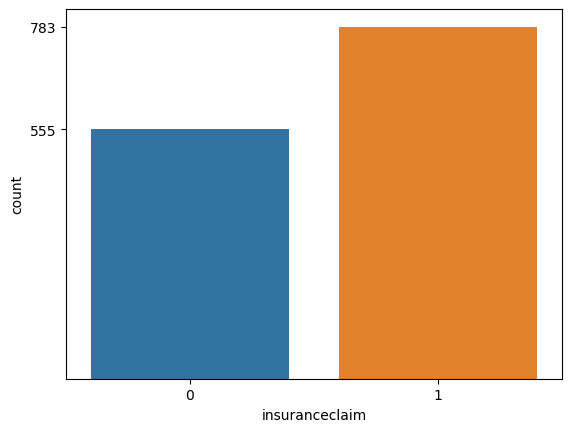

In [6]:
sns.countplot(data=df,x='insuranceclaim')
f=df['insuranceclaim'].value_counts()
plt.yticks(f)
plt.show()

# 5. To check null values

In [7]:
df.isnull().sum().to_frame().rename(columns={0:"No.of null values"})

,No.of null values
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0
insuranceclaim,0


# 6. To check datatypes

In [8]:
df.dtypes.to_frame().rename(columns={0:"Datatype of column"})

,Datatype of column
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64
insuranceclaim,int64


# 7.Check Duplicate columns

In [9]:
df.duplicated().sum()

1

# 8.show duplicated row

In [10]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


# 9. remove duplicate row

In [11]:
df.drop_duplicates(inplace=True)

# 10.show duplicated row after delete

In [12]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim


In [13]:
#to check duplicates row
df.duplicated().sum()

0

# 11. how many children category in children column with total values

In [14]:
#how many children 
df['children'].value_counts().to_frame().rename(columns={0:"No.of children category"})

,children
0,573
1,324
2,240
3,157
4,25
5,18


# 12. how many sex category in sex column with total values

In [15]:
df['sex'].value_counts().to_frame().rename(columns={0:"No.of sex"})

,sex
1,675
0,662


# 13. how many region category in region column with total values

In [16]:
#how many region 
df['region'].value_counts().to_frame().rename(columns={0:"No.of region"})

,region
2,364
3,325
1,324
0,324


# 14. how many smoker category in smoker column with total values

In [17]:
#how many smoker 
df['smoker'].value_counts().to_frame().rename(columns={0:"No.of smoker"})

,smoker
0,1063
1,274


# <span style="background-color: #EB824F; padding: 10px"><strong>**Separating Indepenent (x) and Dependent Variable (y)**</strong></span>

In [18]:
#select input and output
X=df.drop("insuranceclaim",axis=1)  #input select
Y=df['insuranceclaim']  #output

# check input data

In [19]:
X

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


# check output data

In [20]:
Y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1337, dtype: int64

# <span style="background-color: #EB824F; padding: 10px"><strong>**Splitting Data for Model Training and testing:**</strong></span>

In [21]:
# call train test split class
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# check Training and teasting data of input columns

In [22]:
X_train.shape,X_test.shape

((935, 7), (402, 7))

# Apply standard Scaler on X_Train and X_test inputs

In [23]:
#apply standard Scaler on X_Train and X_test inputs
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [24]:
X_train,X_test

(array([[ 0.76935907, -1.05611771, -0.54584829, ..., -0.53158148,
         -1.38997482,  0.97973397],
        [ 1.34169182, -1.05611771, -0.57768002, ..., -0.53158148,
         -0.48304777, -0.11634023],
        [ 1.5563166 ,  0.94686415,  0.91841121, ..., -0.53158148,
          1.33080632,  1.16614713],
        ...,
        [-1.23380557,  0.94686415,  0.5280537 , ..., -0.53158148,
          0.42387927, -0.97698935],
        [ 0.05394313, -1.05611771, -1.40698031, ...,  1.88117914,
          0.42387927,  0.47286216],
        [ 1.41323342,  0.94686415,  1.76278969, ...,  1.88117914,
          0.42387927,  2.88193206]]),
 array([[ 0.3401095 , -1.05611771,  1.39588714, ...,  1.88117914,
         -0.48304777,  2.3934608 ],
        [ 1.27015023,  0.94686415,  0.15444973, ..., -0.53158148,
         -0.48304777, -0.18729799],
        [ 1.12706704, -1.05611771,  0.29769251, ..., -0.53158148,
         -1.38997482, -0.14439093],
        ...,
        [ 0.98398385,  0.94686415, -1.54435935, ..., -

# Create function for Model Building,Model Accuracy,Model classification Report,Confusion Matrix

In [25]:
def create_model(model):
    model.fit(X_train,Y_train)  #train the model with 70% data
    Y_pred=model.predict(X_test)  #train the model with 30 % data
    #generate report
    #inbuilt class_classification_report
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    Testing_Score=accuracy_score(Y_test, Y_pred)
    print('Testing Score of model',Testing_Score.round(2))
    print(classification_report(Y_test,Y_pred))
    #confusion matrix
   
    y_pred= model.predict(X_test)
    cm = confusion_matrix(Y_test, y_pred)
    # Plot confusion matrix as a heatmap
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    return model

# <span style="background-color: #EB824F; padding: 10px"><strong>**MODEL BUILDING:**</strong></span>

# 1. Logistic Regression Model

Testing Score of model 0.89
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



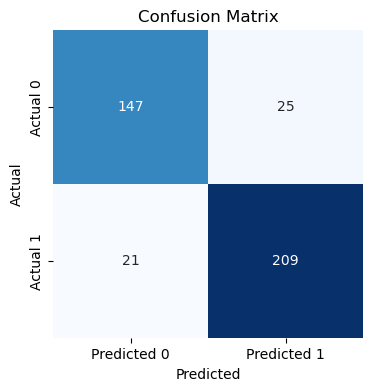

In [26]:
#perform the model with logistic regression
#problem statement : either customer will claim the insurance or not after hospitalize
from sklearn.linear_model import LogisticRegression

#create object of Logistic Regression class
lr=LogisticRegression()
#call function for training and testing the model with logistic regression
lr=create_model(lr)

# Conclusion: 
1. accuracy score is very good .
2. accuracy score is alwyas good .most of the time ,it is very good.
3. means we should not depend only accuracy score .we also check recall,precision ,f1 score

# Conclusion of Logistic Algorithm

1. Apply logistic regression on dataset insurance.csv , got Reacall score=91%
2. but logistic Regression : is not select automatic features 
3. so apply DecisionTreeClassifier in insurance.csv dataset
4. DecisionTreeClassifier is a clasification algorithm. its select features automatic from given dataset

# 2. DecisionTree Model

Testing Score of model 0.98
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       172
           1       0.98      0.98      0.98       230

    accuracy                           0.98       402
   macro avg       0.97      0.97      0.97       402
weighted avg       0.98      0.98      0.98       402



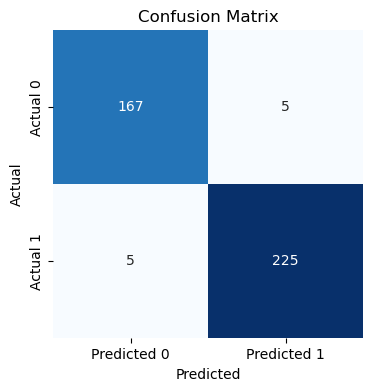

In [27]:
#to call DecisionTreeClassifier inbuilt class
from sklearn.tree import DecisionTreeClassifier
#object of DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=27)  #by default use Gini index
#call function for training and test with DecisionTreeClassifier
dtc=create_model(dtc)

# Conclusion of Decision Tree Algorithm Model

1. got recall= 0.98 in DecisionTreeClassifier class but in the case
2. of logistic Regression : get recall =0.91
3. DecisionTreeClassifier is the best algorithm in this dataset
4. insurance.csv and important features : childern,bmi,smoker,age,charges

# Check important features

In [28]:
#use inbuilt attributes features_importance_of DecisionTreeClassifier class
dtc.feature_importances_
#show information gain of each input features

array([0.07925095, 0.        , 0.33126323, 0.37644457, 0.18086023,
       0.        , 0.03218102])

In [29]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
#create dictionary 
dict={'Features':X.columns,'IG':dtc.feature_importances_}
df3=pd.DataFrame(dict)
#sort dataframe by column IG
df3.sort_values(by='IG',ascending=False)

,Features,IG
3,children,0.376445
2,bmi,0.331263
4,smoker,0.180860
0,age,0.079251
6,charges,0.032181
1,sex,0.000000
5,region,0.000000


# Show Decision Tree Which build by  Decision Tree Algorithm Model 

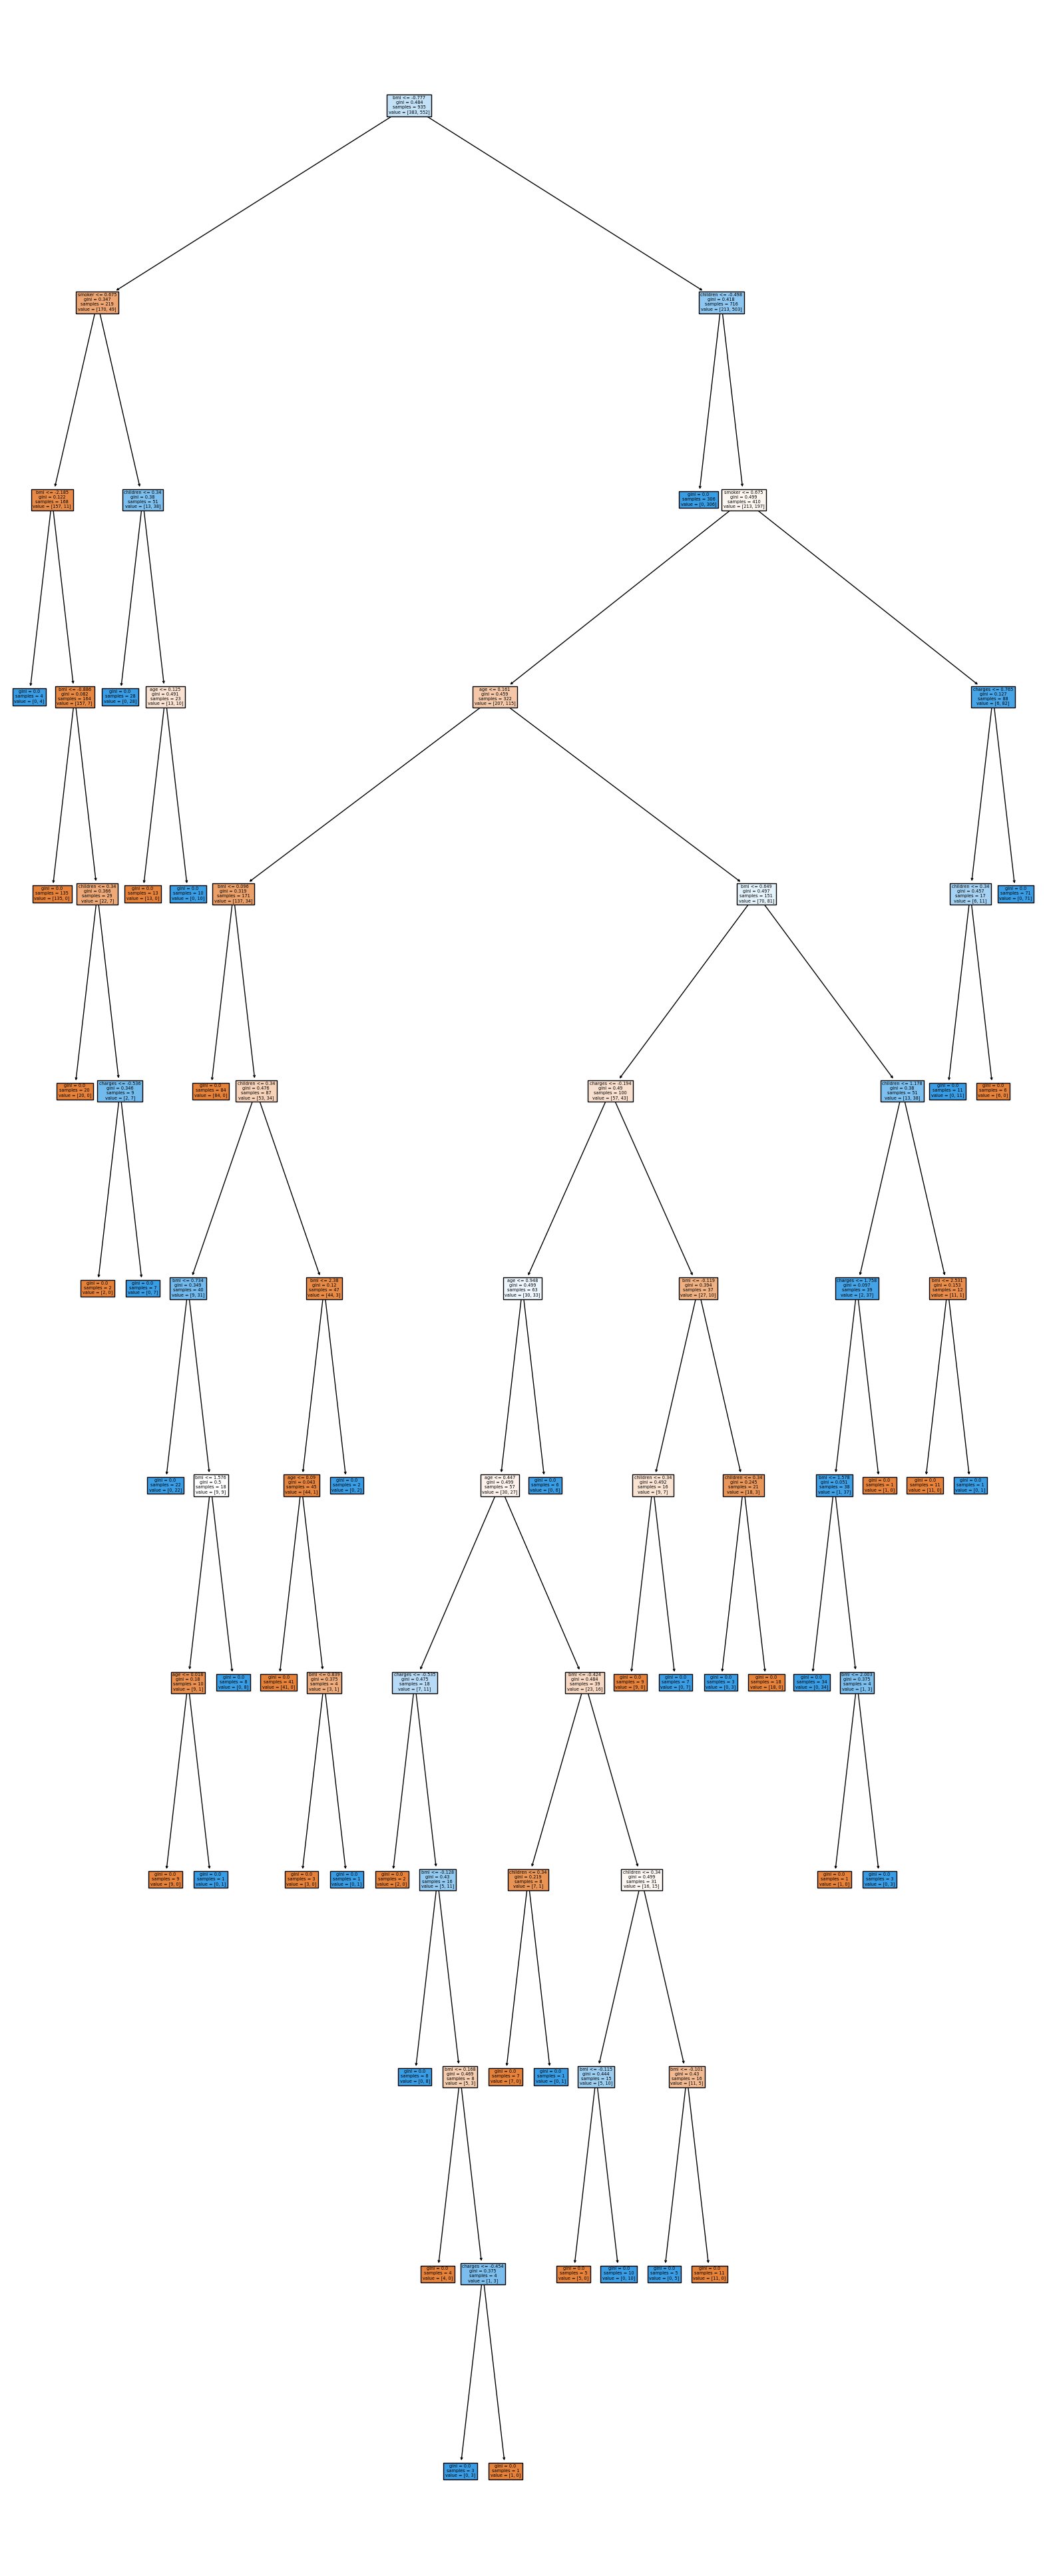

In [31]:
#create a Tree
from sklearn import tree
features=X.columns
plt.figure(figsize=(20,50))
_=tree.plot_tree(dtc,feature_names=features,filled=True)

# Will select Decision Tree Algorithm model as our final model as its accuracy is good  which is 98% Accuracy Score

# Deployment of model

In [32]:
#Deployment of model
#save object of model in file permanent
#first open permanent file in temporary in write binary mode(wb)
import pickle   #pickle inbuilt libarary og python : to handle file handling in binary format

Insurance1=open("model1.pkl",'wb')

#file1 is temporary file and model.pkl is a permanent file and extenstion.pkl
#save object of StandardScaler class in file 
Insurance2=open('scale1.pkl','wb')

#to save the object of Linear Regression in file1
pickle.dump(dtc,Insurance1)   #pickle.dump(object of model,temp file for model)

#dump() inbuilt method of pickle,to store in file permanently
#to close the temporary file file1

Insurance1.close()

#to store object of standard scaler in file2
pickle.dump(ss,Insurance2)

#to close temporary file file2
Insurance2.close()